## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Mon Nov 25 16:57:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 431.86       Driver Version: 431.86       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:01:00.0 Off |                  N/A |
| 42%   45C    P8     7W / 170W |    408MiB /  6144MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Activation
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D
from keras import backend as K
from keras.datasets import cifar10
import itertools
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = 2*x/255-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE,decay=1e-5)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 43us/step - loss: 2.2570 - accuracy: 0.1550 - val_loss: 2.1966 - val_accuracy: 0.1779
Epoch 2/100
50000/50000 [==============================] - 2s 38us/step - loss: 2.1415 - accuracy: 0.2139 - val_loss: 2.1068 - val_accuracy: 0.2264
Epoch 3/100
50000/50000 [==============================] - 2s 37us/step - loss: 2.0574 - accuracy: 0.2535 - val_loss: 2.0670 - val_accuracy: 0.2442
Epoch 4/100
50000/50000 [==============================] - 2s 37us/step - loss: 2.0019 - accuracy: 0.2756 - val_loss: 2.0180 - val_accuracy: 0.2654
Epoch 5/100
50000/50000 [==============================] - 2s 37us/step - loss: 1.9627 - accuracy: 0.2931 - val_loss: 2.0211 - val_accuracy: 0.2742
Epoch 6/100
50000/50000 [==============================] - 2s 38us/step - loss: 1.9260 - accuracy: 0.3068 - val_loss: 2.0286 - val_accuracy: 0.2681
Epoch 7/100
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 34us/step - loss: 0.3787 - accuracy: 0.8722 - val_loss: 4.5807 - val_accuracy: 0.2754
Epoch 55/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.3895 - accuracy: 0.8674 - val_loss: 4.7332 - val_accuracy: 0.2811
Epoch 56/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.3486 - accuracy: 0.8816 - val_loss: 4.7472 - val_accuracy: 0.2861
Epoch 57/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.3210 - accuracy: 0.8931 - val_loss: 4.9092 - val_accuracy: 0.2770
Epoch 58/100
50000/50000 [==============================] - 2s 36us/step - loss: 0.3100 - accuracy: 0.8969 - val_loss: 5.0083 - val_accuracy: 0.2840
Epoch 59/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.3361 - accuracy: 0.8856 - val_loss: 5.1609 - val_accuracy: 0.2799
Epoch 60/100
50000/50000 [==============================] - 2s 35us/step - loss: 0.3240 - accuracy: 0.8902 - val_loss: 

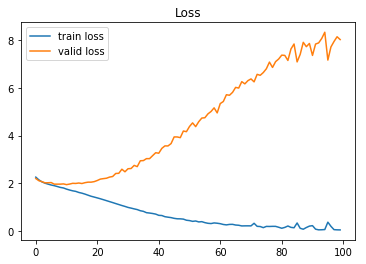

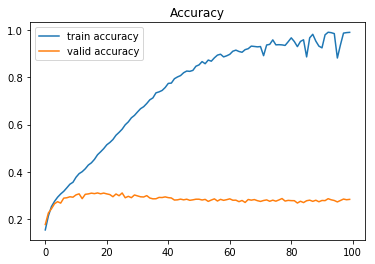

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
